<a href="https://colab.research.google.com/github/rohandhiman5/IVDC-induction-Rohan/blob/main/problem6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#so the first part which is splitting dataset into train test and validate

After that i am using the inceptionV3 model here. and Cnn i have applied in problem 7.

In [1]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d ahemateja19bec1025/traffic-sign-dataset-classification


100% 190M/190M [00:05<00:00, 40.9MB/s]
100% 190M/190M [00:05<00:00, 36.4MB/s]


In [2]:
from zipfile import ZipFile
# specify the name of the zip file
file ='/content/traffic-sign-dataset-classification.zip'
with ZipFile(file, 'r') as zip:
    zip.extractall()

In [5]:
import pandas as pd
import numpy as np
import tensorflow as tf
from PIL import Image
import os
import matplotlib.pyplot as plt
import plotly.express as px
import random
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [6]:
#creater basic folder
Traffic_data='/content/traffic_Data'
train_folder='/content/traffic_Data/DATA'
test_folder='/content/traffic_Data/TEST'

In [7]:
classes=pd.read_csv('/content/labels.csv')
class_size= len(classes)
print(class_size)

58


In [18]:
import os
import numpy as np
from PIL import Image

def image(training_data, labels, Traffic_data, train_folder):
    for i in os.listdir(os.path.join(Traffic_data, train_folder)):
        path_of_class_folder = os.path.join(Traffic_data, train_folder, i)
        for signal in os.listdir(path_of_class_folder):
            img_signal = Image.open(os.path.join(path_of_class_folder, signal))
            img_signal = img_signal.convert("RGB").resize((120, 120))
            img_signal = np.array(img_signal)
            training_data.append((img_signal, int(i)))
            labels.append(int(i))
    return training_data, np.array(labels)



training_data = []
labels = []

training_data, labels = image(training_data, labels, Traffic_data, train_folder)

training_data_features = []
training_data_labels = []

for data_point in training_data:
    features, label = data_point
    training_data_features.append(features)
    training_data_labels.append(label)



In [19]:
training_data_features = np.array(training_data_features)
training_data_labels = np.array(training_data_labels)
training_data_features, validation_data_features, training_data_labels, validation_data_labels = train_test_split(training_data_features, training_data_labels, test_size=0.3, random_state=40)

In [20]:
validation_data_features = np.array(validation_data_features)
validation_data_labels = np.array(validation_data_labels)

In [21]:
from keras.applications import InceptionV3
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model

def inceptionV3Model():
    base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(120, 120, 3))

    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(232, activation='relu')(x)
    x = Dense(116, activation='relu')(x)
    predictions = Dense(58, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=predictions)

    return model
inceptionV3_model = inceptionV3Model()
inceptionV3_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])



In [22]:
trafficSignNetwork = inceptionV3_model.fit(training_data_features, training_data_labels, batch_size=20, epochs=5, validation_data=(validation_data_features, validation_data_labels))

Epoch 1/5
146/146 [==============================] - 126s 796ms/step - loss: 10.6370 - accuracy: 0.2758 - val_loss: 3.0278 - val_accuracy: 0.3133
Epoch 2/5
146/146 [==============================] - 113s 777ms/step - loss: 2.6619 - accuracy: 0.3535 - val_loss: 2.4341 - val_accuracy: 0.4205
Epoch 3/5
146/146 [==============================] - 104s 710ms/step - loss: 2.0679 - accuracy: 0.4865 - val_loss: 2.4809 - val_accuracy: 0.4309
Epoch 4/5
146/146 [==============================] - 104s 714ms/step - loss: 1.8722 - accuracy: 0.5224 - val_loss: 2.1630 - val_accuracy: 0.5388
Epoch 5/5
146/146 [==============================] - 115s 789ms/step - loss: 1.7204 - accuracy: 0.5536 - val_loss: 1.7395 - val_accuracy: 0.5540


In [33]:
testing_data = []
for test_image_file in os.listdir(os.path.join(Traffic_data, test_folder)):
    testImage = Image.open(os.path.join(Traffic_data , test_folder, test_image_file))
    testImage = testImage.convert("RGB")
    testImage = testImage.resize((120,120))
    testImage = np.array(testImage)
    testing_data.append((testImage, [int(test_image_file[1:3])]))

testing_data_features = []
testing_data_labels = []

for data_point in testing_data:
    features, label = data_point
    testing_data_features.append(features)
    testing_data_labels.append(label)

testing_data_features = np.array(testing_data_features)
testing_data_labels = np.array(testing_data_labels)


In [32]:
predictions = inceptionV3_model.predict(testing_data_features)
predicted_labels = np.argmax(predictions, axis=1)

63/63 [==============================] - 62s 959ms/step


28      watch out for cars
17                 No horn
7     speed limit (80km/h)
37       Children crossing
4     Speed limit (50km/h)
              ...         
56                Unknown7
26              keep Right
10        Dont Go straight
2     Speed limit (30km/h)
40                Unknown1
Name: Name, Length: 1994, dtype: object
hello
54             No stopping
11            Dont Go Left
7     speed limit (80km/h)
2     Speed limit (30km/h)
30       Bicycles crossing
              ...         
27    Roundabout mandatory
43    Go right or straight
10        Dont Go straight
54             No stopping
35          Zebra Crossing
Name: Name, Length: 1994, dtype: object


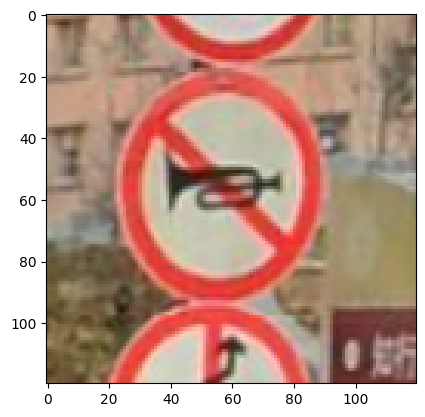

In [34]:
print(classes['Name'][predicted_labels])
print("hello")
print(classes['Name'][testing_data_labels[:,0]])
plt.imshow(testing_data_features[5])

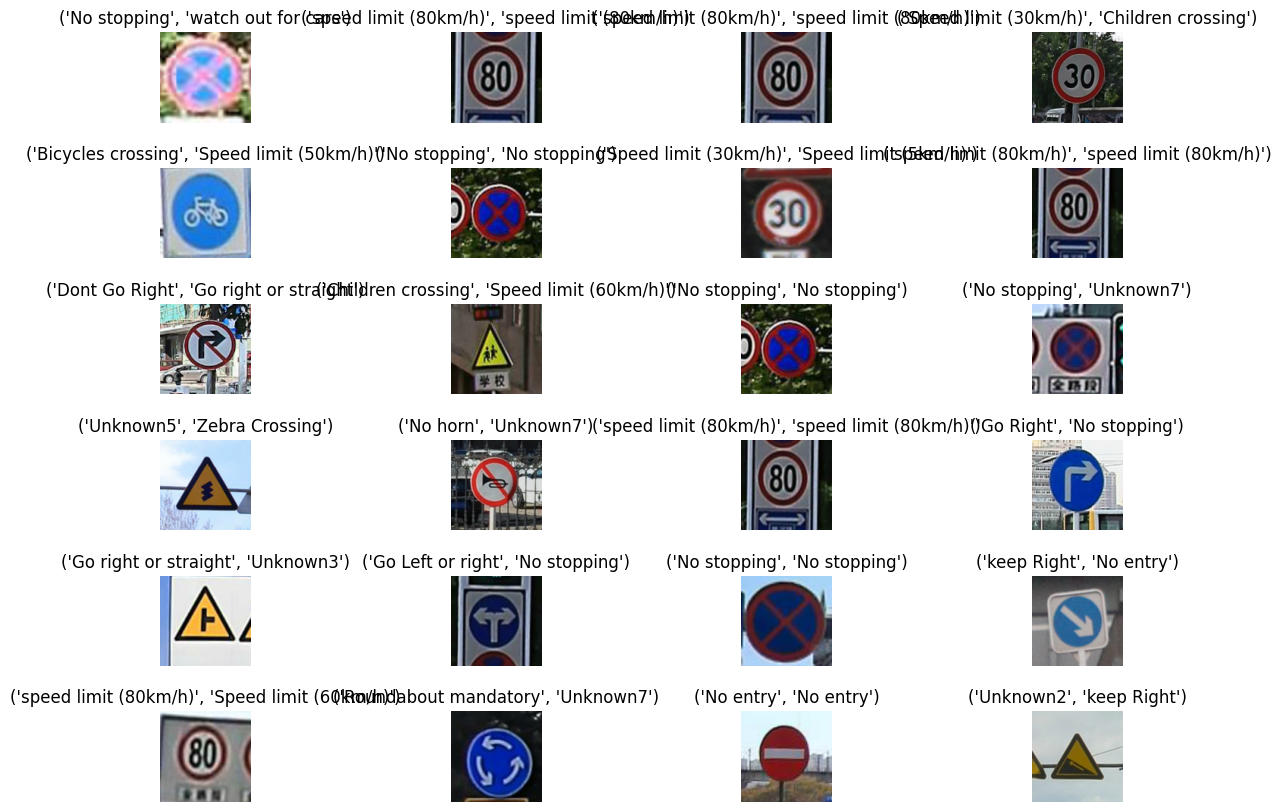

In [37]:
imageDisplayer(testing_data_features, testing_data_labels, predicted_labels)


In [38]:
def calculate_accuracy(actual_labels, predicted_labels):

    actual_labels = np.array(actual_labels)
    predicted_labels = np.array(predicted_labels)
    correct_predictions = (actual_labels == predicted_labels).sum()
    total_predictions = len(actual_labels)
    accuracy = correct_predictions / total_predictions
    return accuracy


In [39]:
# Calculate accuracy
accuracy = calculate_accuracy(testing_data_labels, predicted_labels)
print("Accuracy:", accuracy)


Accuracy: 67.82948846539618
